We compare six models: Linear Regression, Ridge, Lasso, Elastic Net (regression on synthetic quadratic data), Logistic Regression, and Softmax Regression (classification on Iris). Metrics include RMSE/R² for regression, Accuracy/F1-score for classification, training time, and feature importance.

c:\Users\92343\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\92343\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Comparison Table:
Model                RMSE       R²         Accuracy   F1-Score   Training Time (s)  Feature Importance            
Linear Regression    0.7974     0.8569     -          -          0.001975           [1.64753834 1.53790685]       
Ridge                0.7952     0.8577     -          -          0.001997           [1.62525828 1.51686601]       
Lasso                0.7969     0.8571     -          -          0.003005           [1.53724115 1.42760974]       
Elastic Net          0.8004     0.8558     -          -          0.003995           [1.50962951 1.40479236]       
Logistic Regression  -          -          1.0000     1.0000     0.028999           [ 1.13337835 -0.13367015]     
Softmax Regression   -          -          1.0000     1.0000     0.006001           [0.00000000e+00 2.96059473e-16]


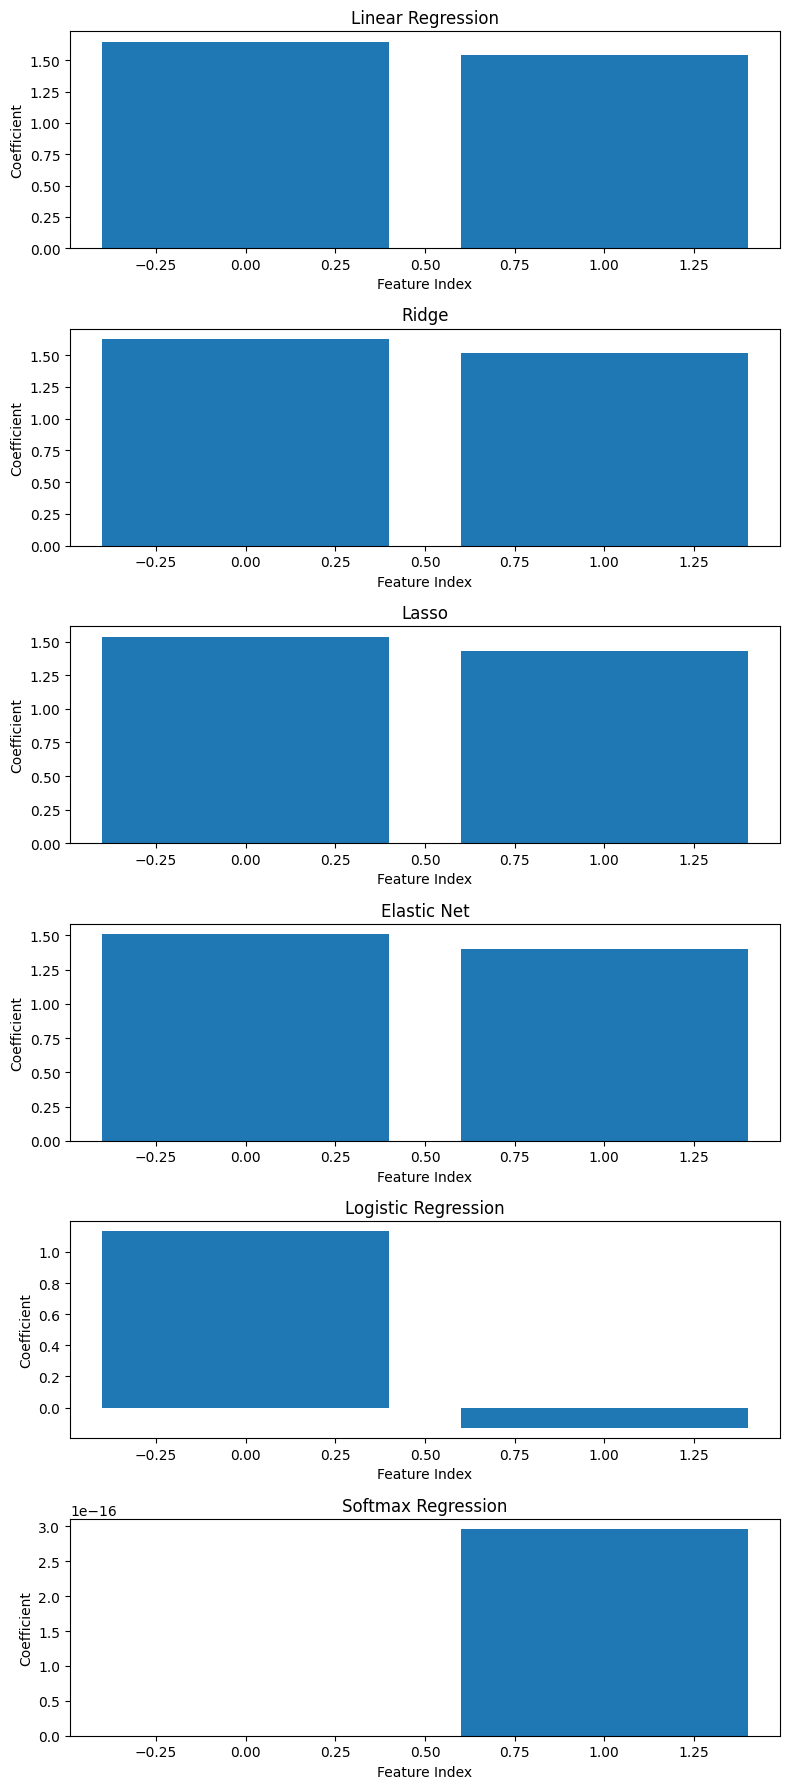

In [3]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Generate synthetic regression data
m = 100
X_reg = 6 * np.random.rand(m, 1) - 3
y_reg = 0.5 * X_reg**2 + X_reg + 2 + np.random.randn(m, 1)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_reg_poly = poly.fit_transform(X_reg)
X_reg_train, X_reg_val, y_reg_train, y_reg_val = train_test_split(X_reg_poly, y_reg, test_size=0.2, random_state=42)
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_val_scaled = scaler_reg.transform(X_reg_val)

# Load and prepare classification data (Iris)
iris = load_iris()
X_clf = iris.data[:, [2, 3]]  # Petal length and width
y_clf = iris.target
X_clf_train, X_clf_val, y_clf_train, y_clf_val = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
scaler_clf = StandardScaler()
X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
X_clf_val_scaled = scaler_clf.transform(X_clf_val)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=10000),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000),
    'Logistic Regression': LogisticRegression(multi_class='ovr', C=10),
    'Softmax Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
}

# Train and evaluate models
results = []

# Regression models
for name in ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']:
    model = models[name]
    start_time = time.time()
    model.fit(X_reg_train_scaled, y_reg_train.ravel())
    training_time = time.time() - start_time
    y_val_pred = model.predict(X_reg_val_scaled)
    rmse = np.sqrt(mean_squared_error(y_reg_val, y_val_pred))
    r2 = r2_score(y_reg_val, y_val_pred)
    coef = model.coef_.flatten()
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy': None,
        'F1-Score': None,
        'Training Time (s)': training_time,
        'Feature Importance': coef
    })

# Classification models
for name in ['Logistic Regression', 'Softmax Regression']:
    model = models[name]
    start_time = time.time()
    model.fit(X_clf_train_scaled, y_clf_train)
    training_time = time.time() - start_time
    y_val_pred = model.predict(X_clf_val_scaled)
    accuracy = accuracy_score(y_clf_val, y_val_pred)
    f1 = f1_score(y_clf_val, y_val_pred, average='weighted')
    coef = model.coef_.mean(axis=0)  # average across classes
    results.append({
        'Model': name,
        'RMSE': None,
        'R²': None,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Training Time (s)': training_time,
        'Feature Importance': coef
    })

# Print comparison table
print("Model Comparison Table:")
print(f"{'Model':<20} {'RMSE':<10} {'R²':<10} {'Accuracy':<10} {'F1-Score':<10} {'Training Time (s)':<18} {'Feature Importance':<30}")
for r in results:
    rmse_str = f"{r['RMSE']:.4f}" if r['RMSE'] is not None else "-"
    r2_str = f"{r['R²']:.4f}" if r['R²'] is not None else "-"
    acc_str = f"{r['Accuracy']:.4f}" if r['Accuracy'] is not None else "-"
    f1_str = f"{r['F1-Score']:.4f}" if r['F1-Score'] is not None else "-"
    time_str = f"{r['Training Time (s)']:.6f}"
    feat_str = str(r['Feature Importance'][:2])
    print(f"{r['Model']:<20} {rmse_str:<10} {r2_str:<10} {acc_str:<10} {f1_str:<10} {time_str:<18} {feat_str:<30}")

# Coefficient analysis: separate subplot for each model
n_models = len(results)
fig, axes = plt.subplots(n_models, 1, figsize=(8, 3 * n_models))

for i, r in enumerate(results):
    ax = axes[i] if n_models > 1 else axes
    if r['Feature Importance'] is not None:
        ax.bar(np.arange(len(r['Feature Importance'])), r['Feature Importance'])
        ax.set_title(r['Model'])
        ax.set_xlabel('Feature Index')
        ax.set_ylabel('Coefficient')

plt.tight_layout()
plt.savefig("feature_importance_subplots.png")
plt.show()


# Learning Curve Visualizations

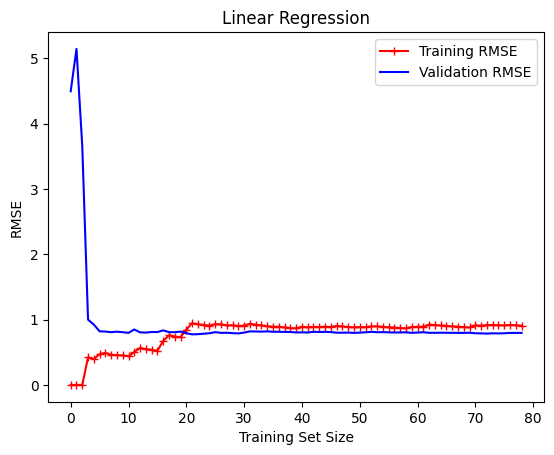

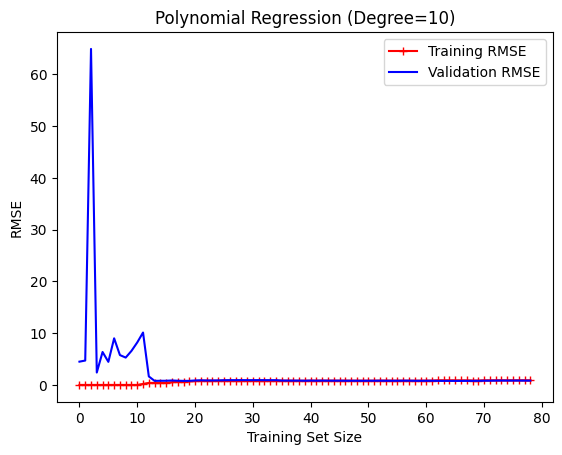

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Regression learning curves
def plot_learning_curves(model, X, y, title):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_pred)))
        val_errors.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    plt.plot(train_errors, "r-+", label="Training RMSE")
    plt.plot(val_errors, "b-", label="Validation RMSE")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.title(title)
    plt.legend()
    plt.savefig(f'learning_curve_{title.lower().replace(" ", "_")}.png')
    plt.show()

# Linear Regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_reg_poly, y_reg, "Linear Regression")

# Polynomial Regression (degree=10)
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_reg, X_reg, y_reg, "Polynomial Regression (Degree=10)")